In [1]:
# 잔차 연결을 사용하여 모델 구성하기

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Add
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# 잔차 연결을 포함한 네트워크를 구현합니다.
def residual_bloc(inputs, num_channels, use_transform = False):
    x = Conv2D(num_channels, (3, 3), activation = 'relu',
               padding = 'same')(inputs)
    x = Conv2D(num_channels, (3, 3), padding = 'same')(x)

    # 입력값의 형태가 변환되는 경우,
    # 1x1 컨볼루션을 통해 형태를 조절해줍니다.
    if use_transform:
        x = MaxPooling2D(strides = 2)(x)
        inputs = Conv2D(num_channels, (1, 1), strides = 2,
                        padding = 'same')(inputs)
        
    # 입력값과 변환된 입력값을 더해줍니다.
    add_x = Add()([inputs, x])

    return Activation('relu')(add_x)
    
# 쉬운 이해를 위해 MNIST와 동일한 형태로 사용했습니다.
inputs = Input(shape = (28, 28, 1))
# use_transform은 MaxPooling을 통해, 
# 입력값의 크기에 변환을 주겠다는 인자입니다.
x = residual_bloc(inputs, 32, use_transform=True)
x = residual_bloc(x, 32)
x = residual_bloc(x, 32, use_transform=True)

# 분류기 부분입니다.
x = GlobalAveragePooling2D()(x)
x = Dense(10, activation = 'softmax')(x)

# 모델을 구성합니다.
model = Model(inputs = inputs, outputs = x)

In [2]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 28, 28,    │        320 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 28, 28,    │      9,248 │ conv2d[0][0]      │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 14, 14,    │         64 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 14, 14,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 14, 14,    │          0 │ conv2d_2[0][0],   │
│                     │ 32)               │            │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 14, 14,    │          0 │ add[0][0]         │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 14, 14,    │      9,248 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 14, 14,    │      9,248 │ conv2d_3[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 14, 14,    │          0 │ activation[0][0], │
│                     │ 32)               │            │ conv2d_4[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 14, 14,    │          0 │ add_1[0][0]       │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 14, 14,    │      9,248 │ activation_1[0][… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 14, 14,    │      9,248 │ conv2d_5[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 7, 7, 32)  │      1,056 │ activation_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 7, 7, 32)  │          0 │ conv2d_6[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 7, 7, 32)  │          0 │ conv2d_7[0][0],   │
│                     │                   │            │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 7, 7, 32)  │          0 │ add_2[0][0]       │
│ (Activation)        │                   │            │                 

 Total params: 48,010 (187.54 KB)

 Trainable params: 48,010 (187.54 KB)

 Non-trainable params: 0 (0.00 B)

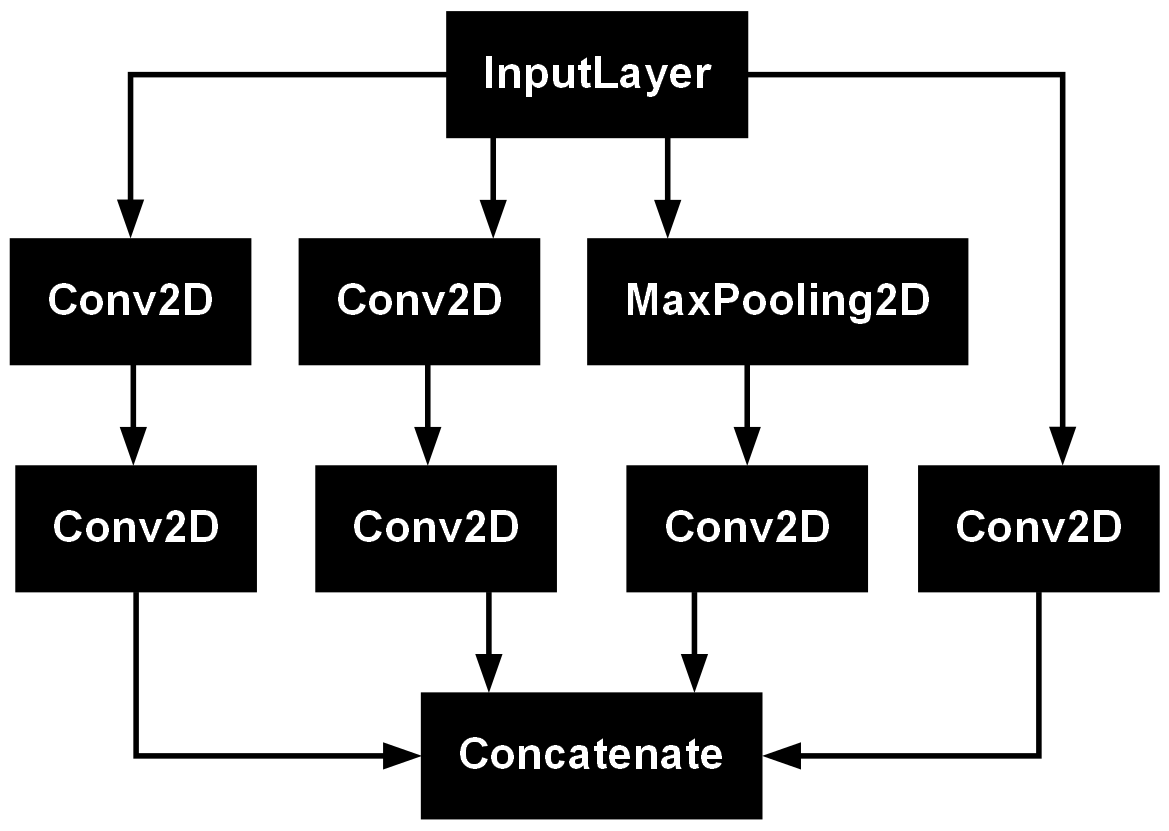

In [3]:
# 인셉션 모듈을 사용하여 모델 구성하기

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Concatenate
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

def inception_module(x):
    x_1 = Conv2D(32, (1, 1), activation='relu')(x)

    x_2 = Conv2D(48, (1, 1), activation='relu')(x)
    x_2 = Conv2D(64, (3, 3), activation='relu', padding='same')(x_2)

    x_3 = Conv2D(16, (1, 1), activation='relu')(x)
    x_3 = Conv2D(16, (5, 5), activation='relu', padding='same')(x_3)

    x_4 = MaxPooling2D(pool_size=(3, 3), strides = 1, padding='same')(x)
    x_4 = Conv2D(32, (1, 1), activation='relu', padding='same')(x_4)

    output = Concatenate()([x_1, x_2, x_3, x_4])

    return output

inputs = Input(shape = (224, 224, 3))
x = inception_module(inputs)

model = Model(inputs = inputs, outputs = x)

from tensorflow.keras.utils import plot_model
plot_model(model)